# LINEAR REGRESSION

* **Regression analysis** : Statistical method to model the relationship between a continuous dependent (target) and independent (predictor) variables with one or more independent variables. 

* **Linear regression** is a statistical method used to model the relationship between a continuous dependent variable (target or label) and one or more independent variables (predictors or features) by fitting a predictor linear equation on the observed data.  
    * simple linear regression- one independent variable
    * multiple linear regression - more than one independent varaible

## SIMPLE LINEAR REGRESSION

* The main aim is to find a best fit line with the coresponding slope and intercept values which can produce minimal residual error so that the predictions are as much as closer to the actual values.
<img src="Images/LinearRegressionDiagram.png" style="width:500px; height:300px;">
* Greater the relationship between the dependent and independent variable , more the accuracy of the linear model. i.e. closer the points to the line better the accuracy.
<img src="Images/LinearRegressionFormula.png" style="width:250px; height:50px;">
* The slope is calculated by the multiplying the correlation of the dependent and independent variable to the ratio of its standard deviation.
<img src="Images/OLS.png" style="width:300px; height:300px;">
<img src="Images/LinearRegressionSlope.png" style="width:275px; height:70px;">
* The intercept is calculated by subracting the mean of the dependent variable from the product of the slope and the mean of the dependent variable.
<img src="Images/LinearRegressionIntercept.png" style="width:150px; height:50px;">


## METRICS FOR EVALUATING REGRESSION 

* **Types of loss functions** :
    * **Regression Cost Function / Evaluation of Regression** :
        * **Mean Error** : 
            * Mean of values
            * simple approach but negative and positive errors can cancel out each other and result in zero-mean error model 
        * **Mean Square Error / L2 Loss** : 
            * Mean of the square of the difference between the actual value and predicted value
            * advantage : 
                * Helps in reducing small deviation
                * MSE is in the form of quadratic equation (ax*2 + bx + c) , thus when ploted gives a gradient descent with only one global minima and no local minima.
                * penalises the model for making larger errors by squaring them.
            * disadvantage : 
                * Error from outliers is also increased due to squaring thus MSE is not robust to remove them.
            <img src="Images/MSE.png" style="width:150px; height:50px;">
         * **Mean Absolute Error / L1 Loss** : 
              * Mean of the difference between the actual value and predicted value
              * Advantage: Not afffected by noise or outliers and robust 
              * Disadvantage : 
                  * Computation is difficult (Modulus is expensive).
                  * MAE is a linear equation, thus it may have local minima.
            <img src="Images/MAE.png" style="width:150px; height:50px;">
         * **Huber Loss / Smoothed L1 Loss** : 
             * Combination of both MSE and MAE.
             <img src="Images/HuberLoss.png" style="width:300px; height:100px;" >
             * Hyper parameter is a threshold for transition from quadratic (MSE) to Linear (MAE) Loss.
             * When greater than the threshold it might be an outlier thus we compute MAE for those instances.
             * Thus we get only one global minima for most of the instances and when the (y-y') value is greater than the thredhold we get multiple local minima.
         * **Root Mean Square Error** :
            * Root of the mean of the square of the difference between the actual value and predicted value
             * Adavantage: Penalising Large Errors
            <img src="Images/RMSE.png" style="width:300px; height:80px;">

## R^2 and Adjusted R^2

* **R-squared** (R²) is a statistical measure used to assess the goodness of fit of a regression model.
* Generally used to denote the accuracy of a regression model.
<img src="Images/r2formula.png" style="width:250px; height:150px;">
* R-squared indicates the proportion of the variability in the dependent variable that can be explained by the independent variable(s) included in the model.
<img src="Images/SSres.png" style="width:300px; height:250px;">
* **SSE** (SSres): 
    * (Sum of Squared Errors) is the sum of the squared differences between the actual values (y) and the predicted values (ŷ).  
    * It represents the unexplained variation or the residual sum of squares.
    
<img src="Images/SStot.png" style="width:300px; height:250px;">   

* **SST** (SStot) : 
    * (Total Sum of Squares) is the sum of the squared differences between the actual values (y) and the mean of the dependent variable. 
    * It represents the total variation in the dependent variable.


* R-squared values range from 0 to 1, where:
    * R² = 0: The model uses the mean of the dependent variable as the prediction for all observations.
    * R² = 1: The model's predictions (best fit line) perfectly match the actual values.
    * R² < 0 : The mean line is better predictor than the best fit line. i.e. SSE is lesser than SST.
    * R² is closer to 1 in a good regression model.


* The primary motivation for using **adjusted R-squared** is to penalize the inclusion of irrelevant or less significant predictors in the model. 

* When you add more predictors to a regression model, the R-squared value typically increases, even if the additional predictors don't contribute much to explaining the variation in the dependent variable. This can lead to an overly complex model that doesn't generalize well to new data. Thus we use Adjusted R².

<img src="Images/Adjusted_r2formula.png" style="width:300px; height:250px;">

* When the value of P increases, i.e the number of predictors increases (N-P-1) is a smaller value and when it is divides (N-1) it becomes a larger value. Thus when this calculated value is multiplied with (1-R²) we find that, if R² is maximum the whole ((n-1) / (n - k - 1)) * (1 - R²) is minimum and 1 minus the calculated value becomes maximum else it is minimum. 
* Thus only when the features which added are correlated to the dependent variable then only the Adjusted R² value is maximum.

* Generally, Adjusted R² is less than equal to the R².




## COST FUNCTION AND GRADIENT DESCENT

* The gradient descent is an optimisation algorithm for minimizing a cost function involves computing the gradient of the cost function with respect to the model's parameters (weights and biases) and then updating the parameters in the direction opposite to the gradient.
* Let's consider a simple linear regression model with a single feature (X) and a target variable (y). The model's prediction is given by the equation: 

    y_pred = w * X + b

    * y_pred: Predicted value
    * w: Weight (slope)
    * b: Bias (intercept)
    * X: Feature
* The cost function (also known as the mean squared error) that we want to minimize is:

    J(w, b) = (1/2m) * Σ(y_pred - y)^2

    * J(w, b): Cost function
    * m: Number of data points
    * Σ: Summation over all data points
    * y_pred: Predicted value
    * y: Actual value
* Now, we want to find the values of w and b that minimize the cost function J(w, b). 
<img src="Images/gradient-descent.png" style="width:400px; height:200px;">
* As we could see in the diagram, larger steps are taken at the begining and then as we go down the curve we take smaller differential steps , so that we dont miss the local minima corresponding to the (w,b). Thus, to take these differential steps we differentiate the cost function wrt to the slope and the intercept. If in case when the steps have a positive slope, it means we have missed the local minima and moving up the curve. In that case, we are supposed to take backward steps.
* The gradient of J with respect to w and b is given by the partial derivatives:

    ∂J/∂w = (1/m) * Σ((y_pred - y) * X)
    
    ∂J/∂b = (1/m) * Σ(y_pred - y)
    
* Now, we update the parameters w and b in each iteration(α - learning rate):

    w := w - α * ∂J/∂w
    
    b := b - α * ∂J/∂b
* These updates are performed until a stopping criterion is met (e.g., a maximum number of iterations or convergence to a certain tolerance level(local minima reached)).

## MANUAL IMPLEMENTATION OF LINEAR REGRESSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sample data
X = np.array([1, 2, 3, 4, 5])  # Independent variable (feature)
y = np.array([2, 3.5, 4.5, 5.5, 6.5])  # Dependent variable (target)

In [3]:
# Hyperparameters
learning_rate = 0.01
epochs = 1000

In [4]:
# Initialize slope (coefficient) and intercept
slope = 0
intercept = 0

In [5]:
# Manual Mean Squared Error (MSE) function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [6]:
# Manual Mean Absolute Error (MAE) function
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [7]:
# Manual Root Mean Squared Error (RMSE) function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [8]:
#L1 or L2 regularisation initialise alpha
#lamda = 0.1

# Gradient Descent
for _ in range(epochs):
    y_pred = slope * X + intercept
    error = y_pred - y
    slope_gradient = 2 * np.dot(error, X) / len(X)
    # for L1 regularisation manual implementation
    # slope_gradient = (2 * np.dot(error, X) + lamda * np.sign(slope)) / len(X)
    # for L2 regularisation manual implementation
    # slope_gradient = (2 * np.dot(error, X) + lamda * np.sign(slope)) / len(X)
    intercept_gradient = 2 * np.sum(error) / len(X)
    slope -= learning_rate * slope_gradient
    intercept -= learning_rate * intercept_gradient

In [9]:
# Make predictions
y_pred = slope * X + intercept

In [10]:
# Calculate manual loss functions
manual_mse = mse(y, y_pred)
manual_mae = mae(y, y_pred)
manual_rmse = rmse(y, y_pred)

In [16]:
# Calculate R-squared manually
mean_y = np.mean(y)
SST = np.sum((y - mean_y)**2)
SSE = np.sum((y- y_pred)**2)
R_squared = 1- (SSE / SST)

In [17]:
# Calculate adjusted R-squared manually
N = len(y)
P = 1  # Number of predictors is 1 , as there is only 1 independent variable in simple linear regression.
adjusted_R_squared = 1 - (1 - R_squared) * (N - 1) / (N - P - 1)

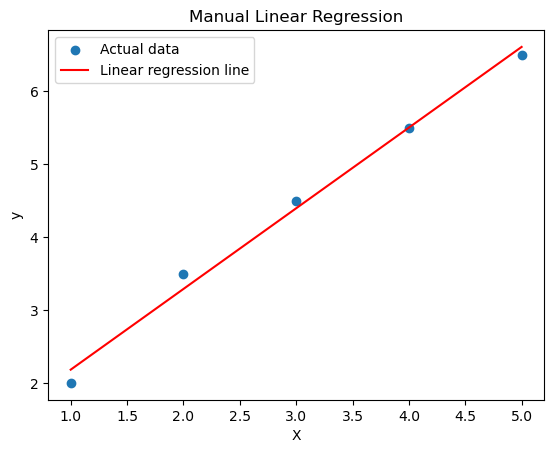

In [18]:
# Plot the data and the linear regression line
plt.scatter(X, y, label='Actual data')
plt.plot(X, y_pred, color='red', label='Linear regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Manual Linear Regression')
plt.legend()
plt.show()

In [14]:
# Print the slope (coefficient) and intercept of the line
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 1.1069194477069237
Intercept: 1.0750185982491374


In [19]:
# Print manual loss values
print("Manual MSE:", manual_mse)
print("Manual MAE:", manual_mae)
print("Manual RMSE:", manual_rmse)

# Print R-squared and adjusted R-squared
print("R-squared:", R_squared)
print("Adjusted R-squared:", adjusted_R_squared)

Manual MSE: 0.020113591737330856
Manual MAE: 0.12192316735675109
Manual RMSE: 0.14182239504863417
R-squared: 0.9917567246978152
Adjusted R-squared: 0.9890089662637536


## IMPLEMENTATION OF LINEAR REGRESSION USING SCIKIT-LEARN LIBRARY

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Modules from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [22]:
# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable (feature)
y = np.array([2, 3.5, 4.5, 5.5, 6.5])       # Dependent variable (target)

In [23]:
# Create a linear regression model
model = LinearRegression()

In [24]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [25]:
# Make predictions
y_pred = model.predict(X)

In [26]:
# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared using scikit-learn
r2 = r2_score(y, y_pred)

# Manually calculate adjusted R-squared (as scikit learn library does not provide a direct method to calculate r2)
N = len(y)
P = 1  # Number of parameters (slope and intercept)
adjusted_r2 = 1 - (1 - r2) * (N - 1) / (N - P - 1)

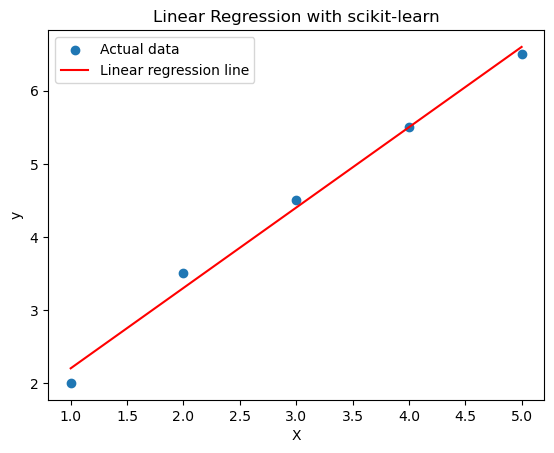

In [27]:
# Plot the data and the linear regression line
plt.scatter(X, y, label='Actual data')
plt.plot(X, y_pred, color='red', label='Linear regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with scikit-learn')
plt.legend()
plt.show()

In [28]:
# Print the slope (coefficient) and intercept of the line
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: 1.1000000000000005
Intercept: 1.0999999999999988


In [29]:
# Print metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Print R-squared and adjusted R-squared
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


Mean Squared Error: 0.02
Mean Absolute Error: 0.12000000000000029
Root Mean Squared Error: 0.1414213562373095
R-squared: 0.9918032786885246
Adjusted R-squared: 0.9890710382513661


## REGULARIZATION

* **OLS** : Ordinary Least Squares is to find the values of the slope (beta_1) and intercept (beta_0) that minimize the sum of squared differences between the predicted values and the actual target values in the training data.
<img src="Images/OLSgraph.png" style="width:300px; height:250px;">
* In this graph the center point represents the value for beta_0 and beta_1 for which the sum of squared difference(cost function) is minimised.
* The sum of squared difference is represented as contours(these are higher dimensional plots represented in 2D). Each and every concentric circle are represented as the same level. Thus the center represents the local minima.
* Disadavantage: When there are few weights(beta_1,beta_2,...) which are large, they tend to affect and overfit the model.
* We overcome this by **Regularization** which is a technique in machine learning that adds constraints or penalties to the model's training process to prevent overfitting and improve generalization on new, unseen data.
* **Overfitting** : Low bias High variance.
* **Underfitting** : High bias High Variance.
* Where **Variance** (test error) is the variation in results of unseen data, where as **bias** (train error) is the error due to the absence of true underlying pattern of the problem in the model.

## LASSO REGRESSION

* **Lasso Regression** : (Least Absolute Shrinkage and Selection Operator) Lasso regression is a type of linear regression with L1 regularization, adding a penalty term based on the absolute values of the coefficients to the linear regression cost function, encouraging some coefficients to become exactly zero and performing feature selection.
<img src="Images/LassoFormula.png" style="width:300px; height:70px;">
* here the absolute of beta corresponds to  
<img src="Images/L1Formula.png" style="width:300px; height:50px;">
* when we plot a graph for beta_1+beta_2 we get a diamond graph as given below.
<img src="Images/LassoGraph.png" style="width:300px; height:250px;">
* The main aim over here is to determine the penalised weights i.e. the lasso coefficients to avoid overfitting. The value of the weights as per the equation of the weight(absolute beta) is not allowed to move outside the edges of the daimond. Here the value corresponding to the point marked as Lasso will determine the beta_1 and beta_2 weights(slope) of the equation rather than the local minima in the OLS.

In [10]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [11]:
# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable (feature)
y = np.array([2, 3.5, 4.5, 5.5, 6.5])       # Dependent variable (target)

In [12]:
# Create a Lasso regression model
alpha = 0.1  # Regularization strength (adjust this value)
model = Lasso(alpha=alpha)

In [13]:
# Fit the model to the data
model.fit(X, y)

Lasso(alpha=0.1)

In [14]:
# Make predictions
y_pred = model.predict(X)

In [15]:
# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

In [16]:
# Calculate R-squared using scikit-learn
r2 = r2_score(y, y_pred)

# Manually calculate adjusted R-squared
N = len(y)
P = 2  # Number of parameters (slope and intercept)
adjusted_r2 = 1 - (1 - r2) * (N - 1) / (N - P - 1)

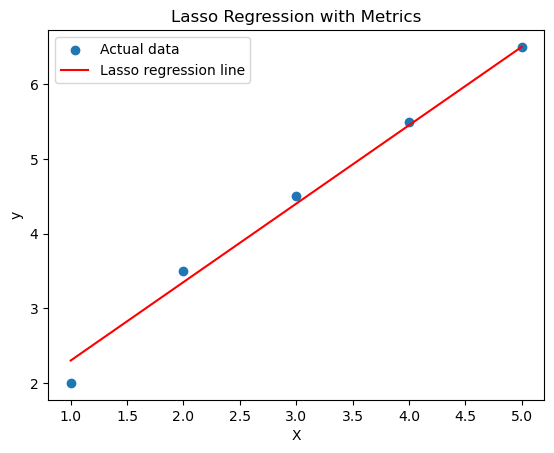

In [17]:
# Plot the data and the Lasso regression line
plt.scatter(X, y, label='Actual data')
plt.plot(X, y_pred, color='red', label='Lasso regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression with Metrics')
plt.legend()
plt.show()

In [18]:
# Print the coefficients (including possible zero coefficients due to L1 regularization)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.05]
Intercept: 1.25


In [19]:
# Print metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Print R-squared and adjusted R-squared
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.02499999999999996
Mean Absolute Error: 0.11999999999999984
Root Mean Squared Error: 0.15811388300841883
R-squared: 0.9897540983606558
Adjusted R-squared: 0.9795081967213115


* As we can see the accuracy of linear regression is greater than lasso regression as we are generalising the model and penalising it to avoid overfitting. In the case of Linear regression due to overfitting the best fit line would have passed through the points resulting in greater accuracy but in lasso regression we penalise the best fit line to avoid overfitting.

## RIDGE REGRESSION

* **Ridge Regression** : Ridge regression is a type of linear regression that includes L2 regularization, adding a penalty term based on the square of the coefficients to the linear regression cost function. This regularization technique helps control the complexity of the model, prevents overfitting, and reduces the impact of multicollinearity among the independent variables. (Ridge in general terms means maximum or peak)
<img src="Images/RidgeFormula.png" style="width:300px; height:70px;">
* here the squared beta corresponds to  
<img src="Images/L2Formula.png" style="width:300px; height:50px;">
* when we plot a graph for beta_1^2 +beta_2^2 we get a circle graph as given below.
<img src="Images/RidgeGraph.png" style="width:300px; height:250px;">
* The main aim over here is to determine the penalised weights i.e. the ridge coefficients to avoid overfitting. The value of the weights as per the equation of the weight(sqaured beta) is not allowed to move outside the perimeter of the circle. Here the value corresponding to the point marked as ridge will determine the beta_1 and beta_2 weights(slope) of the equation rather than the local minima in the OLS.

* The main difference between ridge and lasso is that, in lasso we can do feature selection as coefficents become zero. Previously the lasso coefficient was (beta_1,0). Whereas in Ridge the values are close to zero and does not become zero.

* As, we can continue by raising the penality term to higher orders(to the power of 3 , 4, etc.) to overcome overfitting. (i.e beta^3 , beta^4 .. can be added to form L3 L4 regularisation.)

In [20]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [21]:
#Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable (feature)
y = np.array([2, 3.5, 4.5, 5.5, 6.5])         # Dependent variable (target)

In [22]:
# Regularization strength (alpha parameter)
alpha = 1.0

In [23]:
# Create a Ridge regression model
model = Ridge(alpha=alpha)

In [24]:
# Fit the model to the data
model.fit(X, y)

Ridge()

In [25]:
# Make predictions
y_pred = model.predict(X)

In [30]:
# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared using scikit-learn
r2 = r2_score(y, y_pred)

# Manually calculate adjusted R-squared
N = len(y)
P = 2  # Number of parameters (slope and intercept)
adjusted_r2 = 1 - (1 - r2) * (N - 1) / (N - P - 1)

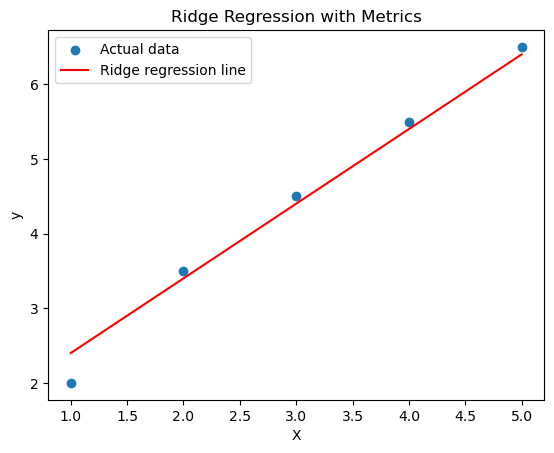

In [27]:
# Plot the data and the Ridge regression line
plt.scatter(X, y, label='Actual data')
plt.plot(X, y_pred, color='red', label='Ridge regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Metrics')
plt.legend()
plt.show()

In [28]:
# Print the coefficients
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient): 1.0
Intercept: 1.4000000000000004


In [31]:
# Print metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Print R-squared and adjusted R-squared
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.039999999999999994
Mean Absolute Error: 0.15999999999999978
Root Mean Squared Error: 0.19999999999999998
R-squared: 0.9836065573770492
Adjusted R-squared: 0.9672131147540983


## HUBER REGRESSION 

* Huber regression is a robust regression technique that combines elements of both the least squares (L2) loss and the absolute error (L1) loss, allowing the model to be less sensitive to outliers in the data while still providing a smooth loss function for the majority of the data points.
* **Huber Loss / Smoothed L1 Loss** : 
     * Combination of both MSE and MAE.
     <img src="Images/HuberLoss.png" style="width:300px; height:100px;" >
     * Hyper parameter is a threshold for transition from quadratic (MSE) to Linear (MAE) Loss.
     * When greater than the threshold it might be an outlier thus we compute MAE for those instances.
     * Thus we get only one global minima for most of the instances and when the (y-y') value is greater than the thredhold we get multiple local minima.

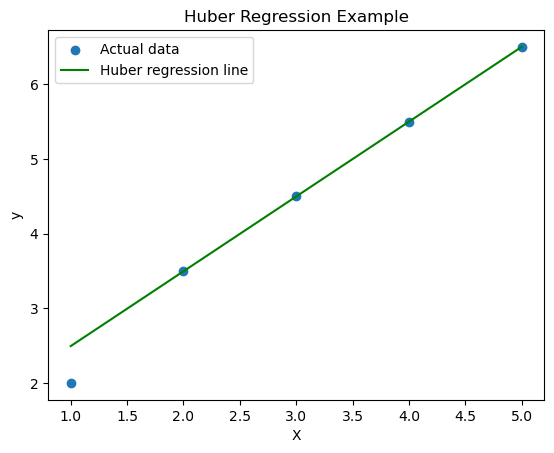

Total Huber Loss: 0.12166575255082296

Mean Squared Error: 0.048666301020329185
Mean Absolute Error: 0.10055553847749525
Root Mean Squared Error: 0.2206043993675765


In [11]:
import numpy as np
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable (feature)
y = np.array([2, 3.5, 4.5, 5.5, 6.5])       # Dependent variable (target)

# Create a HuberRegressor model
huber_model = HuberRegressor()

# Fit the model to the data
huber_model.fit(X, y)

# Make predictions
y_huber_pred = huber_model.predict(X)

# Calculate Huber Loss manually
# huber_delta represents the threshold value above which we caluculate MAE or L1 loss
huber_delta = huber_model.epsilon
huber_loss = np.where(np.abs(y - y_huber_pred) < huber_delta, 
                      0.5 * (y - y_huber_pred) ** 2, 
                      huber_delta * np.abs(y - y_huber_pred) - 0.5 * huber_delta ** 2)
total_huber_loss = np.sum(huber_loss)

# Plot the data and the Huber regression line
plt.scatter(X, y, label='Actual data')
plt.plot(X, y_huber_pred, color='green', label='Huber regression line')
plt.plot(X, y_pred, color='green', label='Huber regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Huber Regression')
plt.legend()
plt.show()

# Print the Huber Loss
print("Total Huber Loss:", total_huber_loss)
 
# Calculate other metrics
mse = mean_squared_error(y, y_huber_pred)
mae = mean_absolute_error(y, y_huber_pred)
rmse = np.sqrt(mse)

# Print the metrics
print("\nMean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


As we can see the prediction is even more accurate while using HuberRegression

## MULTI-COLINEARITY

* Mulitple Linear regression is the prediction of a dependent varaible from two or more independent varaibles.
<img src="Images/MultipleLinearRegression.png" style="width:400px; height:100px;" >
* Multicollinearity is a statistical phenomenon in multiple linear regression where two or more independent variables are highly correlated, making it challenging to determine the individual effect of each variable on the dependent variable.
* In the below example age and years of experience is highly correlated to each other.

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [9]:
# Sample data
data = pd.DataFrame({
    'Age': [21.0,21.5,21.7,22.0,22.2],
    'YearsOfExperience': [1, 1.3, 1.5,2.0,2.2],
    'Salary': [50000, 60000, 75000, 85000, 95000][::-1]
})

In [10]:
# Adding a constant column for the intercept
X = sm.add_constant(data[['Age', 'YearsOfExperience']])
y = data['Salary']

In [12]:
# Fit OLS model
model = sm.OLS(y, X).fit()

In [13]:
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     186.7
Date:                Sat, 12 Aug 2023   Prob (F-statistic):            0.00533
Time:                        22:49:20   Log-Likelihood:                -42.505
No. Observations:                   5   AIC:                             91.01
Df Residuals:                       2   BIC:                             89.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.994e+05   1.87e+0

/Users/anushruthikaezhilmaran/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


* As we could see the std err is very large indicating the presence of multicolinearity , we can check the p value for the independent variables. 
* Here the p value is lesser for years of experience than age. Thus omiting the age varaible could be a remedy to avoid multi colinearity.

In [14]:
X.iloc[:,1:].corr()

,Age,YearsOfExperience
Age,1.00000,0.97582
YearsOfExperience,0.97582,1.00000


* Correlation is typically represented by a coefficient, such as the Pearson correlation coefficient, which ranges from -1 to +1, indicating the strength and direction of the linear relationship. Correlation is useful for understanding the degree of association between two variables, but it doesn't imply causation.

* While the corr() function can help identify pairwise correlations between variables, it alone is not sufficient to determine collinearity in a regression model with multiple predictors. This is because collinearity involves the relationships among all the predictors in the model, not just pairwise correlations.

* The **Variance Inflation Factor (VIF)** is a diagnostic tool used to detect multicollinearity in a regression model. VIF measures the degree of collinearity between each predictor and the other predictors in the model. Specifically, the VIF of a predictor quantifies how much the variance of the estimated regression coefficient is inflated due to collinearity with other predictors.

* A high VIF value (typically greater than 5 or 10) suggests that a predictor is highly correlated with other predictors, indicating potential multicollinearity. Addressing multicollinearity, often through feature selection or regularization techniques (e.g., Ridge or Lasso regression), is important to improve the stability and interpretability of the regression model.

<img src="Images/VIF.png" style="width:300px; height:100px;" >

* R² is the coefficient of determination.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Sample data with three independent variables
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'YearsOfExperience': [2, 5, 8, 10, 12, 15, 18, 20, 22, 25],
    'EducationYears': [12, 14, 16, 16, 18, 18, 20, 20, 22, 22],
    'Income': [50000, 60000, 75000, 85000, 95000, 110000, 120000, 130000, 140000, 150000]
})

In [4]:
# Adding a constant column for the intercept
X = sm.add_constant(data[['Age', 'YearsOfExperience', 'EducationYears']])
y = data['Income']

In [5]:
# Fit OLS model
model = sm.OLS(y, X).fit()

In [6]:
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1170.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.09e-08
Time:                        02:16:33   Log-Likelihood:                -86.161
No. Observations:                  10   AIC:                             180.3
Df Residuals:                       6   BIC:                             181.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.534e+04      2e+0

/Users/anushruthikaezhilmaran/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [8]:
# Print VIF values
print("VIF:")

print(vif_data)

VIF:
             feature          VIF
0              const  1339.101942
1                Age   424.314320
2  YearsOfExperience   465.283981
3     EducationYears    30.520631


* In our case, both "Age" and "YearsOfExperience" have high VIF values, suggesting that these two predictors are highly correlated with each other, which is a form of multicollinearity.

* Avoid multicolinearity by:
    * Feature Selection: most relevant features are selected
    * Combine Highly Correlated Variables: Thus preserves the information of both the varaibles.
    * Regularization Techniques: it shrinks the coefficient estimates.
    * Principal Component Analysis (PCA): Transform correlated variables into a new set of orthogonal (uncorrelated) variables (principal components)
    * Collect More Data: avoid small sample with high variability
    * Domain Knowledge

* **Levels of measurement** : 
    * Regression: 
        * Dependent variable: Metric, Nominal, Ordinal
        * Independent variable: Metric
    * Classification: 
        * Dependent variable: Metric, Nominal, Ordinal
        * Independent variable: Nominal, Ordinal
    * **Metric** : 
        * Metric data, also known as interval/ratio data, have both meaningful order and consistent intervals between values. These data can be treated as numerical and support arithmetic operations.
        * Interval data have a meaningful order and equal intervals, but they don't have a true "zero" point (zero doesn't mean the absence of the quantity being measured).
        * Ratio data have a meaningful order, equal intervals, and a true "zero" point (zero indicates the absence of the quantity being measured).
        * Examples: Temperature in Celsius (interval scale), age in years (ratio scale), height in centimeters (ratio scale), income in dollars (ratio scale).
    * **Nominal** : 
        * Nominal data represent categories or labels without any inherent order or ranking.
        * The data at this scale are typically used to represent categories or groups that don't have numerical value, such as colors, names, or types of objects.
        * Examples: Gender (e.g., "male" or "female"), nationality (e.g., "USA," "Canada," "France"), types of animals (e.g., "dog," "cat," "bird").
    * **Ordinal** :
        * Ordinal data represent categories or labels with a meaningful order or ranking, but the differences between categories are not consistent or meaningful.
        * The data at this scale have a natural order but lack the property of equal intervals. The actual distances between values are not well-defined.
        * Examples: Education level (e.g., "high school," "bachelor's degree," "master's degree"), customer satisfaction ratings (e.g., "low," "medium," "high"), socioeconomic status (e.g., "low," "middle," "high").